<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

# **Note: You will find importing data sets much easier if you have a google drive account.**

## Problem 5

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


nsamples, nx, ny = train_images.shape
X_train = train_images.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_images.shape
X_test = test_images.reshape((nsamples,nx*ny))

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


###a. 

Using a training data set of 42000 observations, transform and fit the training data with 90% of the variance retained. Transform the remaining testing data (do not refit for the second transform)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)

In [0]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### b.

In [4]:
pca.explained_variance_ratio_.size

87

In [5]:
sum(pca.explained_variance_ratio_)

0.9001062226425085

### c.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [0]:
knn.fit(X_train_pca,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

### d.

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Labels of training images')

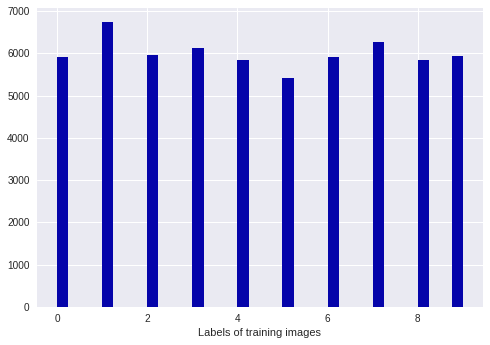

In [0]:
plt.hist(x=train_labels, bins='auto', color='#0504aa')
plt.xlabel('Labels of training images')
plt.show()

## Problem 6

In [6]:
import pandas as pd
import numpy as np
import io
from google.colab import drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [0]:
train6 = pd.read_csv('/content/gdrive/My Drive/lab1/train.csv', sep=',', decimal='.')
test6 = pd.read_csv('/content/gdrive/My Drive/lab1/test.csv', sep=',', decimal='.')

X_train = train6[['ListPrice','Age','Living','Lot']]
y_train = train6.iloc[:,1]
#y_train = train6[['SalePrice']]
X_test = test6.iloc[:, 1:5]

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 3,weights='distance')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [0]:
submission = pd.read_csv('/content/gdrive/My Drive/lab1/Sample submission.csv', sep=',', decimal='.')
submission['SalePrice']=y_pred
df = pd.DataFrame(data=submission)
df.to_csv('/content/gdrive/My Drive/lab1/out6.csv',index = False)


My RMSE is: 61037.669

## Problem 7

### a.

In [0]:
train7 = pd.read_csv('/content/gdrive/My Drive/lab1/rr_train.csv', sep=',', decimal='.')
test7 = pd.read_csv('/content/gdrive/My Drive/lab1/rr_test.csv', sep=',', decimal='.')

In [0]:
import statsmodels.api as sm
y_train =train7.values[:,37] # revenue column
x_train =train7.values[:,0:37] # remove revenue

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
x_train = sm.add_constant(x_train) 
result = sm.OLS(y_train, x_train).fit()

In [0]:
x_test = test7.values[:,1:38]
x_test = sm.add_constant(x_test)

y_pred = result.predict(x_test)

In [0]:
submission = pd.read_csv('/content/gdrive/My Drive/lab1/sample_submission.csv', sep=',', decimal='.')
submission[['revenue']]=y_pred
df = pd.DataFrame(data=submission)
df.to_csv('/content/gdrive/My Drive/lab1/out7.csv',index = False)

# RMSE :1945645

My RMSE is: 2608944.19

### b.

In [0]:
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     1.430
Date:                Wed, 23 Jan 2019   Prob (F-statistic):              0.105
Time:                        02:07:31   Log-Likelihood:                -1578.5
No. Observations:                 100   AIC:                             3233.
Df Residuals:                      62   BIC:                             3332.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.195e+06   4.39e+06      1.411      0.1